In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

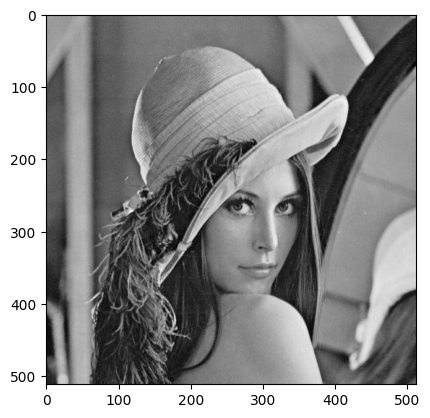

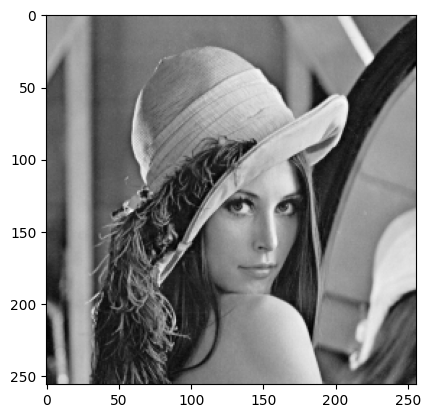

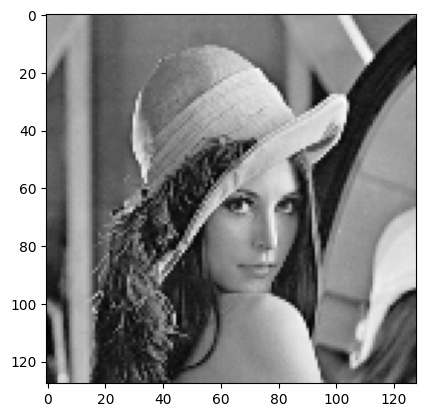

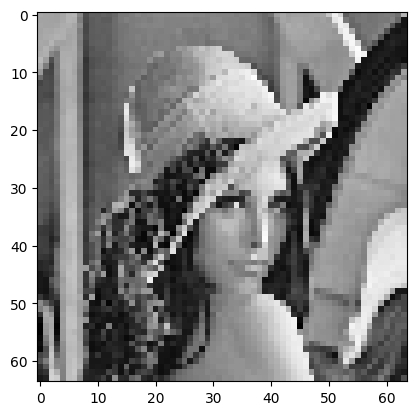

In [4]:
src = cv2.imread('Lena.png', cv2.IMREAD_GRAYSCALE)
h, w = src.shape[:2]

half_src = cv2.resize(src, (h // 2, w // 2))
quarter_src = cv2.resize(src, (h // 4, w // 4))
octa_src = cv2.resize(src, (h // 8, w // 8))

plt.imshow(src, cmap='gray')
plt.show()
plt.imshow(half_src, cmap='gray')
plt.show()
plt.imshow(quarter_src, cmap='gray')
plt.show()
plt.imshow(octa_src, cmap='gray')
plt.show()

In [5]:
def my_downsampling(src, gap):
    h, w = src.shape[:2]
    dst = np.zeros((h // gap, w // gap))

    for i in range(h // gap):
        for k in range(w // gap):
            dst[i, k] = src[i*gap, k*gap]

    return dst

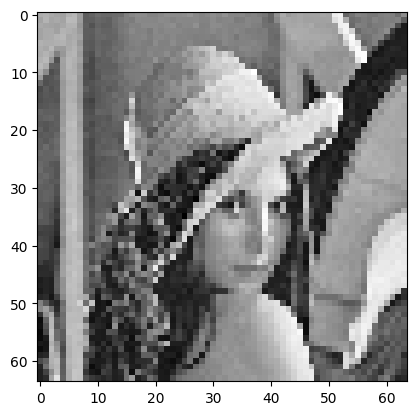

In [6]:
dst = my_downsampling(src, 8)
plt.imshow(dst, cmap='gray')
plt.show()

In [7]:
def my_downsampling(src, gap):
    dst = src[::gap, ::gap]
    return dst

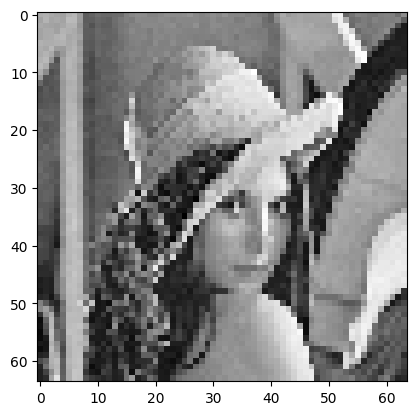

In [8]:
dst = my_downsampling(src, 8)
plt.imshow(dst, cmap='gray')
plt.show()

In [9]:
def my_upsampling(src, gap):
    h, w = src.shape[:2]
    dst = np.zeros((h*gap, w*gap))

    for i in range(h*gap):
        for k in range(w*gap):
            dst[i, k] = src[i//gap, k//gap]

    return dst

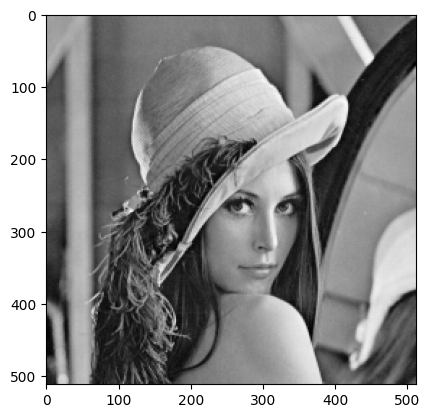

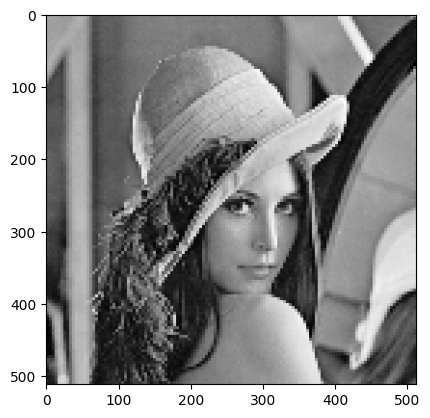

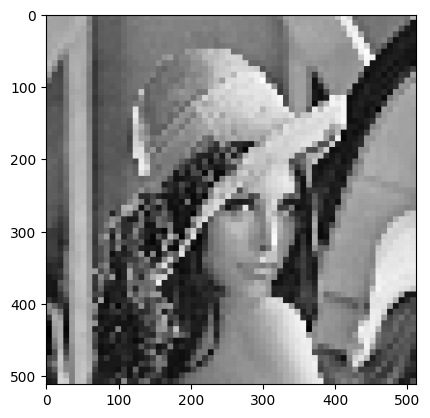

((64, 64), (512, 512))

In [10]:
half_dst = my_upsampling(half_src, 2)
quarter_dst = my_upsampling(quarter_src, 4)
octa_dst = my_upsampling(octa_src, 8)

plt.imshow(half_dst, cmap='gray')
plt.show()
plt.imshow(quarter_dst, cmap='gray')
plt.show()
plt.imshow(octa_dst, cmap='gray')
plt.show()
octa_src.shape, octa_dst.shape

In [11]:
def my_downsampling(src, gap):
    gaussian_blar = cv2.GaussianBlur(src, (5, 5), 1)
    dst = gaussian_blar[::gap, ::gap]

    return dst

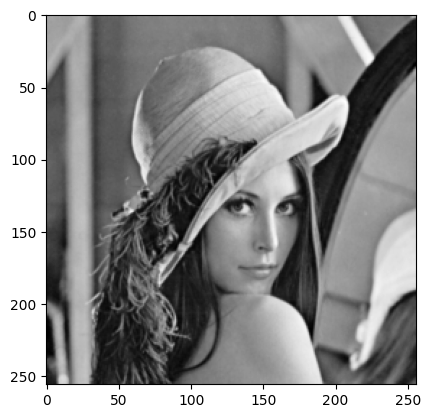

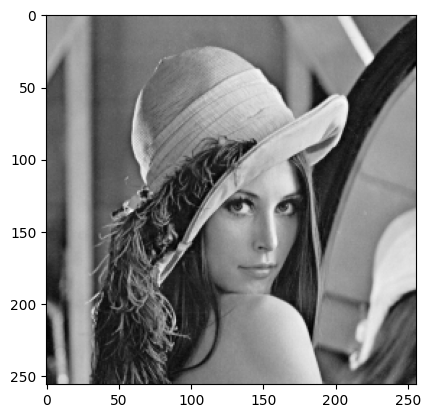

In [12]:
gaussian_half = my_downsampling(src, 2)

plt.imshow(gaussian_half, cmap='gray')
plt.show()
plt.imshow(half_src, cmap='gray')
plt.show()

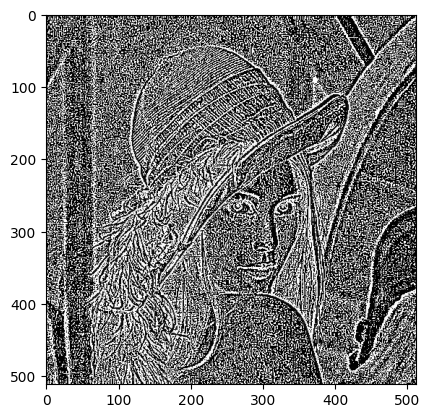

In [13]:
gaussian_src = cv2.GaussianBlur(src, (5, 5), 1)
res = src - gaussian_src
norm_res = ((res - res.min()) / (res.max() - res.min()))

plt.imshow(norm_res, cmap='gray')
plt.show()

In [15]:
def my_imsi(src, scale):

    (h, w) = src.shape
    
    # 0.5를 더한 값에서 버림 진행 -> 반올림과 같음
    # 이미지 확장 시 원본 픽셀을 넘어서는 픽셀값이 생길 수 있음
    h_dst = int(h * scale + 0.5)
    w_dst = int(w * scale + 0.5)


    dst = np.zeros((h_dst, w_dst))

    for row in range(h_dst):
        for col in range(w_dst):
            y = row / scale
            x = col / scale

            # m, n: 기존 이미지의 픽셀 좌표(반올림)
            m = int(y)
            n = int(x)
            
            if m >= h:
                m = h - 1
            elif n >= w:
                n = w - 1
            
            dst[row, col] = src[m, n]

    return dst

In [ ]:
if __name__ == '__main__':
    src = cv2.imread('../imgs/Lena.png', cv2.IMREAD_GRAYSCALE)

    scale = 3
    #이미지 크기 ??x??로 변경
    my_dst_mini = my_imsi(src, 1/scale)
    my_dst_mini = my_dst_mini.astype(np.uint8)

    #이미지 크기 512x512로 변경(Lena.png 이미지의 shape는 (512, 512))
    my_dst = my_imsi(my_dst_mini, scale)
    my_dst = my_dst.astype(np.uint8)

    
    # 출력 윈도우에 학번과 이름을 써주시기 바립니다.
    # cv2.imshow('[200000 홍길동]original', src)
    # cv2.imshow('[200000 홍길동]my bilinear mini', my_dst_mini)
    # cv2.imshow('[200000 홍길동]my bilinear', my_dst)

    # cv2.waitKey()
    # cv2.destroyAllWindows()

In [14]:
import cv2
import numpy as np

"""
해당 부분에 여러분 정보 입력해주세요.
00대학교 00학과  2000000 홍길동
"""

def my_bilinear(src, scale):
    #########################
    # TODO                  #
    # my_bilinear 완성      #
    #########################
    (h, w) = src.shape
    
    # 0.5를 더한 값에서 버림 진행 -> 반올림과 같음
    # 이미지 확장 시 원본 픽셀을 넘어서는 픽셀값이 생길 수 있음
    h_dst = int(h * scale + 0.5)
    w_dst = int(w * scale + 0.5)


    dst = np.zeros((h_dst, w_dst))

    # bilinear interpolation 적용
    for row in range(h_dst):
        for col in range(w_dst):
            y = row / scale
            x = col / scale

            # m, n: 기존 이미지의 픽셀 좌표
            m = int(y)
            n = int(x)

            # t, s: 바뀔 픽셀값에 대한 상대적 비율(0~1값)
            t = y - m
            s = x - n

            """
            픽셀 위치가 이미지를 넘어서는 경우를 막기위해서 조건문을 사용
            각 조건문을 생각하여 코드를 완성하기
            Hint: 4가지에 대한 경우를 생각해야함
            1. m+1, n+1 모두 이미지를 넘어서는 경우
            2. m+1이 이미지를 넘어서는 경우 
            3. n+1이 이미지를 넘어서는 경우
            4. 그외
            """
            value = None
            
            if m+1 >= h and n+1 >= w:
                value = src[h-1, w-1]
            elif m+1 >= h:
                value = (1-s)*src[h-1, n] + s*src[h-1, n+1]
            elif n+1 >= w:
                value = (1-t)*src[m, w-1] + t*src[m+1, w-1]
            else:
                value = s*t*src[m+1, n+1] + t*(1-s)*src[m+1, n] + s*(1-t)*src[m, n+1] + (1-s)*(1-t)*src[m, n]

            dst[row, col] = value

    return dst

if __name__ == '__main__':
    src = cv2.imread('../imgs/Lena.png', cv2.IMREAD_GRAYSCALE)

    scale = 3
    #이미지 크기 ??x??로 변경
    my_dst_mini = my_bilinear(src, 1/scale)
    my_dst_mini = my_dst_mini.astype(np.uint8)

    #이미지 크기 512x512로 변경(Lena.png 이미지의 shape는 (512, 512))
    my_dst = my_bilinear(my_dst_mini, scale)
    my_dst = my_dst.astype(np.uint8)

    # 출력 윈도우에 학번과 이름을 써주시기 바립니다.
    cv2.imshow('[200000 홍길동]original', src)
    cv2.imshow('[200000 홍길동]my bilinear mini', my_dst_mini)
    cv2.imshow('[200000 홍길동]my bilinear', my_dst)

    cv2.waitKey()
    cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'